In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from pandas.core.frame import DataFrame


In [8]:
train=pd.read_csv('train.csv')

In [9]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        float64
domain            object
url               object
urlid             float64
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: float64(2), int64(11), object(12)
memory usage: 463.7+ MB


In [13]:
len(train['advertiser'].unique())

9

#  plotting by weekday

In [57]:
wd=df['weekday'].unique()
wd.sort()
ctr_wd=[]
cost_wd=[]
cpc_wd=[]
for i in wd:
    df_wki=df[df['weekday']==i]
    clicks=df_wki['click'].sum()
    cost_temp=df_wki['payprice'].mean()
    cpc_tep=df_wki['payprice'].sum()/clicks/1000
    cost_wd.append(cost_temp)
    ctr=clicks/len(df_wki)
    ctr_wd.append(ctr)
    cpc_wd.append(cpc_tep)

In [58]:
c={"weekday" :wd ,
   "ctr" : ctr_wd,
    "cost":cost_wd,
      "cpc": cpc_wd}#将列表a，b转换成字典
wd_data=DataFrame(c)#


In [59]:
wd_data

,weekday,ctr,cost,cpc
0,0,0.000644,76.502512,118.834373
1,1,0.000676,82.259322,121.626189
2,2,0.000965,80.043588,82.964899
3,3,0.000833,76.536456,91.851049
4,4,0.000810,77.657396,95.900413
5,5,0.000725,79.802179,110.056575
6,6,0.000569,74.518796,130.943425


Text(0,0.5,'CPC')

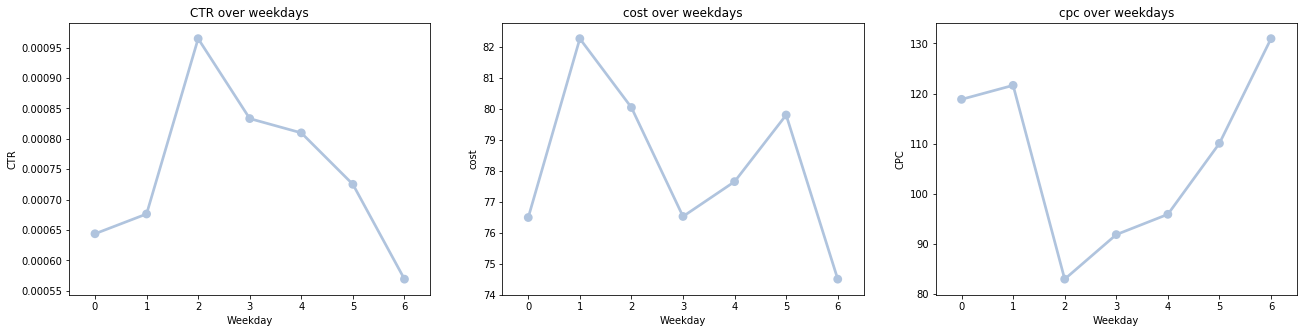

In [63]:
plt.figure(figsize = (22,5))
plt.subplot(1,3,1)
sns.pointplot(x='weekday', y='ctr', data=wd_data, color='lightsteelblue')
plt.title('CTR over weekdays')
plt.xlabel('Weekday')
plt.ylabel('CTR')
plt.subplot(1,3,2)
sns.pointplot(wd,cost_wd,color='lightsteelblue')
plt.title('cost over weekdays')
plt.xlabel('Weekday')
plt.ylabel('cost')
plt.subplot(1,3,3)
sns.pointplot(x='weekday', y='cpc', data=wd_data, color='lightsteelblue')
plt.title('cpc over weekdays')
plt.xlabel('Weekday')
plt.ylabel('CPC')



In [30]:
hr=df['hour'].unique()
ctr_hr=[]
for i in hr:
    df_hri=df[df['hour']==i]
    clicks=df_hri['click'].sum()
    ctr=clicks/len(df_hri)
    ctr_hr.append(ctr)

Text(0,0.5,'CTR')

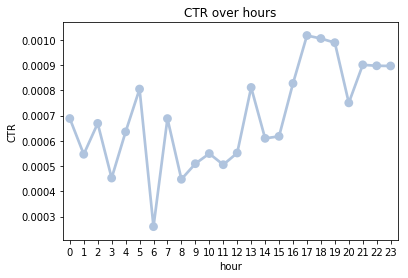

In [31]:
sns.pointplot(hr,ctr_hr,color='lightsteelblue')
plt.title('CTR over hours')
plt.xlabel('hour')
plt.ylabel('CTR')